# Notebook to test pyMRAW for working with Photron data

In [14]:
import os
import glob
# import pyMRAW
import cv2
import numpy as np

from pySciCam.pySciCam import ImageSequence

In [2]:
from read_photron import my_read_cih

## Get path to file we want to work with

In [3]:
# path to data 
root_path = '/media/sam/SamData/HighSpeedVideo/'
expt_folder = '01_13012023'
file_ext = '.mraw'

# file identifiers
cam_num = 1
header_num = 1
partition_num = 1
file_id_str = 'C%03dH%03dS%04d'%(cam_num, header_num, partition_num)
print(file_id_str)

C001H001S0001


In [4]:
# get path to specific data file
search_str = '*%s*/*_%s*%s' %(file_id_str, file_id_str, file_ext)
data_path = glob.glob(os.path.join(root_path, expt_folder, search_str))

if not len(data_path) == 1:
    print('Error finding unique file for current identifier')
    mraw_filename = None
else:
    mraw_filename = data_path[0]
print(mraw_filename)

/media/sam/SamData/HighSpeedVideo/01_13012023/fly_01_C001H001S0001/fly_01_C001H001S0001.mraw


## Try to open cih file (metadata)

In [5]:
# get filename specifically for cih
base_filename, ext = os.path.splitext(mraw_filename)
cih_filename = base_filename + '.cihx'

In [6]:
# open cih
cih = my_read_cih(cih_filename)

In [23]:
ctime = os.path.getctime(cih_filename)
import time
print(time.strftime('%Y/%m/%d', time.gmtime(ctime)))


2023/01/17


In [7]:
print(cih)

{'Date': '2023/1/13', 'Camera Type': 'FASTCAM Nova S6 type 800K-M-64GB 10GbE model', 'Record Rate(fps)': 8000.0, 'Shutter Speed(s)': 8000.0, 'Total Frame': 9505, 'Original Total Frame': 9505, 'Image Width': 896, 'Image Height': 896, 'File Format': 'Mraw', 'EffectiveBit Depth': 12, 'EffectiveBit Side': 'Lower', 'Color Bit': 12, 'Comment Text': ''}


## Try pySciCam

In [8]:
# try on just a limited set of frames
frames = (0, 100)
raw_type = 'photron_mraw_mono_12bit'

I = ImageSequence(mraw_filename,rawtype=raw_type,width=896,height=896, frames=frames)

Reading /media/sam/SamData/HighSpeedVideo/01_13012023/fly_01_C001H001S0001/fly_01_C001H001S0001.mraw
PFV 12-bit MRAW
File contains 9505 frames (896 x 896)
Reading frames 0 to 100
Read 114.0 MiB in 1.2 sec
	Data in memory:	 (100, 896, 896)
	Intensity range:	 0 to 4095 	 uint16
	Array size:	153.1 MB


In [9]:
tmp = I.arr

In [10]:
print(tmp.shape)

(100, 896, 896)


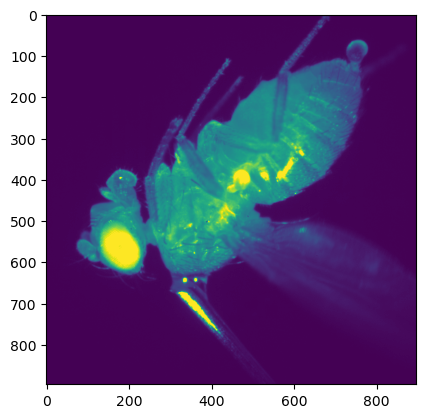

In [12]:
import matplotlib.pyplot as plt

plt.imshow(tmp[0,:,:])